In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from import_file import *
load_libs()

In [2]:
# ipath= './data/NCDC/uk/boscombe_down/dat.txt' # weird shape at 3, try 4
# ipath= './data/NCDC/europe/ciampino/dat.txt' # try 4
ipath= './data/NCDC/tiree.txt'
# ipath= "./data/NCDC/marham.txt"

uipath = unicode(ipath , "utf8")
file2 = open(uipath)
df = pd.read_csv(uipath,header=0, skipinitialspace=True)
df.drop(['USAF', 'NCDC', 'I','Type' ,'QCP','Q','Q.1','I.1','Unnamed: 12'], 1,inplace=True)
df.rename(columns={'Date':'date','Dir': 'dir', 'Spd':'speed'}, inplace=True)
df.describe()

,date,HrMn,dir,speed
count,5.239490e+05,523949.000000,523949.000000,523949.000000
mean,1.996096e+07,1154.187698,216.937656,8.730526
std,1.581475e+05,667.329057,137.692199,37.601270
min,1.929100e+07,0.000000,10.000000,0.000000
25%,1.986011e+07,600.000000,150.000000,4.600000
50%,1.998113e+07,1150.000000,210.000000,6.700000
75%,2.010033e+07,1700.000000,280.000000,9.800000
max,2.015080e+07,2350.000000,999.000000,999.900000


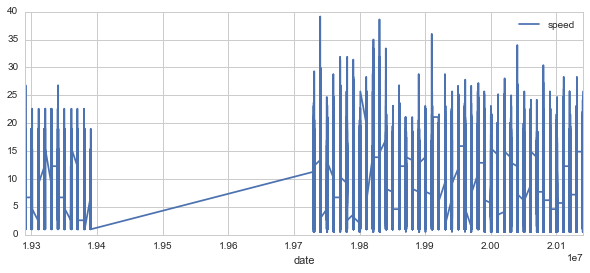

In [3]:
# select year 1945-2014, dir < 999, speed<999
df = df[(df['dir'] < 999) & (df['speed'] < 999)& (df['date'] < 20150000) ]
df.rename(columns={'speed':'speed_mps'}, inplace=True)
df['speed']=df['speed_mps']
df.index= df['date']
df['speed'].plot(legend=True,figsize=(10,4), grid=True)

In [4]:
# Data Selection
# Marham, date >1973
# Ciampino, date： 1973~2014
if "ciampino" not in ipath: 
    df = df[ (df['date'] > 19730000) & (df['date'] < 20150000)]
    df = df[df['HrMn'] % 100 <= 0.1]
else: 
    # For Roma Ciampino
    df = df[ (df['date'] > 19720000) & (df['date'] < 20150000)]
    df = df[(df['HrMn'] % 100 == 15)|(df['HrMn'] % 100 == 45)|(df['HrMn'] % 100 == 20)|(df['HrMn'] % 100 == 50)]

In [5]:
# Using speed unit in knot instead of m/s
df['speed']=df['speed_mps']*1.943845
# need more elaboration, some is not near an integer
df['speed'] =  df['speed'].apply(lambda x: int(round(x)))

In [6]:
df.describe()

,date,HrMn,dir,speed_mps,speed
count,3.534910e+05,353491.00000,353491.000000,353491.000000,353491.000000
mean,1.993527e+07,1151.10710,203.557007,7.446540,14.478637
std,1.212514e+05,691.12767,93.825886,3.821445,7.427810
min,1.973010e+07,0.00000,10.000000,0.500000,1.000000
25%,1.983063e+07,600.00000,140.000000,4.600000,9.000000
50%,1.993110e+07,1200.00000,210.000000,6.700000,13.000000
75%,2.004063e+07,1700.00000,280.000000,9.800000,19.000000
max,2.014123e+07,2300.00000,360.000000,39.100000,76.000000


              date  HrMn  dir  speed_mps  speed  incre  incre_reverse
date                                                                 
19740111  19740111   400  190       39.1     76   41.0           36.0
19910103  19910103   600  250       36.0     70   44.0           46.0
20040421  20040421  1100  160       34.0     66   33.0           32.0
19781228  19781228  1800  200       31.9     62   36.0           38.0
19770406  19770406  1800  330       31.9     62   32.0           30.0
19831018  19831018  1400  240       31.4     61   31.0           24.0
19770623  19770623  1000  110       31.4     61   47.0           50.0
19790509  19790509   100  310       31.4     61   45.0           48.0
19741111  19741111   100  220       29.9     58    8.0            4.0
19731011  19731011   500   60       29.3     57   48.0           50.0
19930121  19930121  2100  270       28.8     56    8.0            6.0
19740128  19740128   500  200       28.8     56   15.0            5.0
19760120  19760120  

/Users/cqcn1991/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


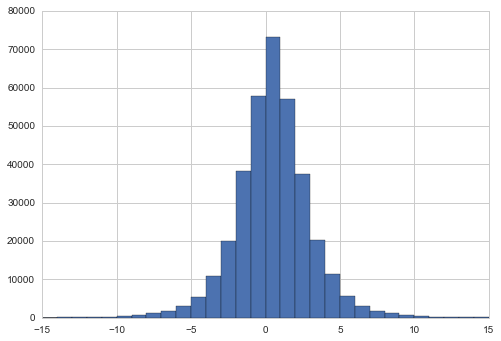

In [7]:
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0)
print df.sort('speed',ascending=False).head(20)
bins=np.arange(-15, 15 + 1, 1)
df['incre'].hist(bins=bins)

In [8]:
# Simple Artefacts Handling
df =  df[ (df['incre'] < 20)&(df['incre_reverse'] < 20)]
df = df[df['dir'] % 10 <= 0.1]
df = df[df['speed'] >= 0.1 ]

## After Simple Aretefacts Hnadling

In [9]:
# Check the max speed
print df.sort('speed',ascending=False).head(20)

              date  HrMn  dir  speed_mps  speed  incre  incre_reverse
date                                                                 
19741111  19741111   100  220       29.9     58    8.0            4.0
19740128  19740128   500  200       28.8     56   15.0            5.0
19760120  19760120   800  280       28.8     56    8.0            6.0
19890213  19890213  1500  290       28.8     56    6.0            6.0
19930121  19930121  2100  270       28.8     56    8.0            6.0
19930117  19930117   500  270       28.3     55   12.0            3.0
20111208  20111208  1400  270       28.3     55    3.0            6.0
20111208  20111208  1200  260       27.8     54    2.0            2.0
19791217  19791217   100  240       27.8     54    1.0            2.0
19961106  19961106   400  240       27.8     54    5.0            1.0
19840121  19840121  1900  140       27.8     54    4.0            2.0
19741111  19741111   200  240       27.8     54   -4.0            2.0
19961106  19961106  

/Users/cqcn1991/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


1800    14861
1200    14856
1500    14854
900     14825
600     14772
1400    14754
1700    14754
1100    14749
800     14744
1900    14734
1600    14732
1000    14726
2100    14723
1300    14721
300     14719
2000    14696
700     14683
2200    14654
100     14643
500     14643
2300    14637
400     14637
200     14624
0       14586
Name: HrMn, dtype: int64


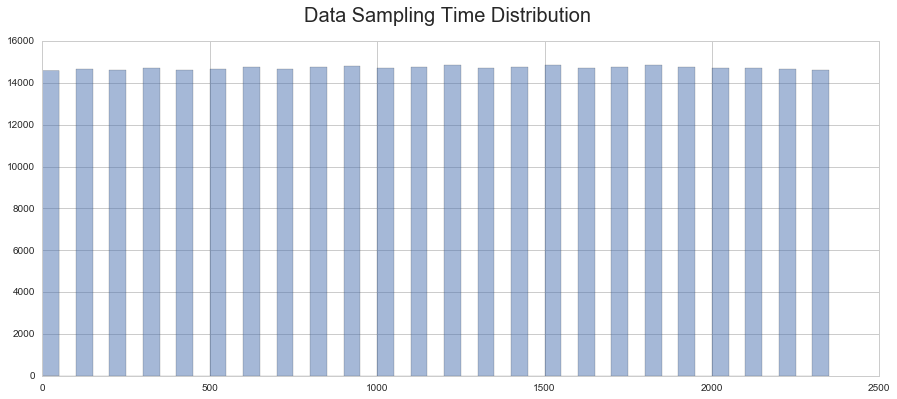

In [10]:
# Ensure data sampled equally
print df['HrMn'].value_counts()
bins=np.arange(min(df.HrMn), max(df.HrMn) + 100, 50)
df['HrMn'].hist(bins=bins, alpha=0.5,figsize=(15, 6))
plt.suptitle('Data Sampling Time Distribution', fontsize = 20)

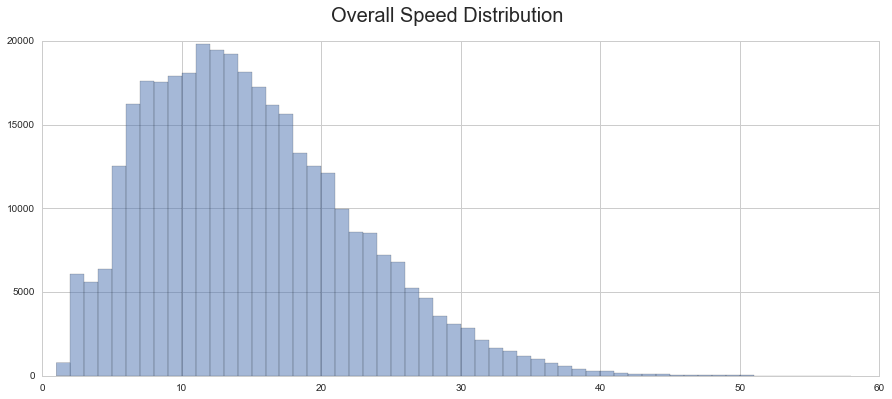

In [11]:
bins=np.arange(min(df.speed), max(df.speed) + 1, 1)
df['speed'].hist(bins=bins, alpha=0.5,figsize=(15, 6))
plt.suptitle('Overall Speed Distribution', fontsize = 20)

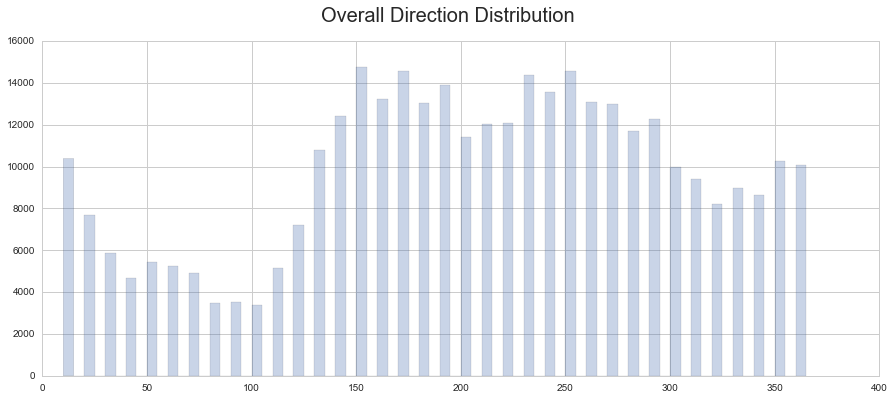

In [12]:
bins=np.arange(min(df.dir), max(df.dir) + 10, 5)
df['dir'].hist(bins=bins, alpha=0.3,figsize=(15, 6))
plt.suptitle('Overall Direction Distribution', fontsize = 20)

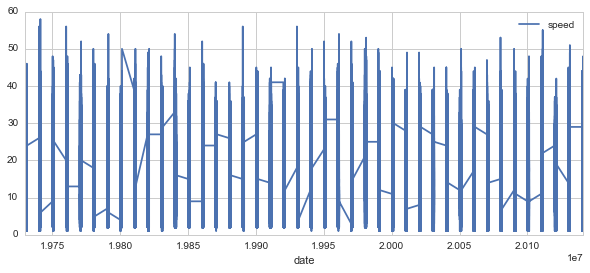

In [13]:
df['speed'].plot(legend=True,figsize=(10,4), grid=True)

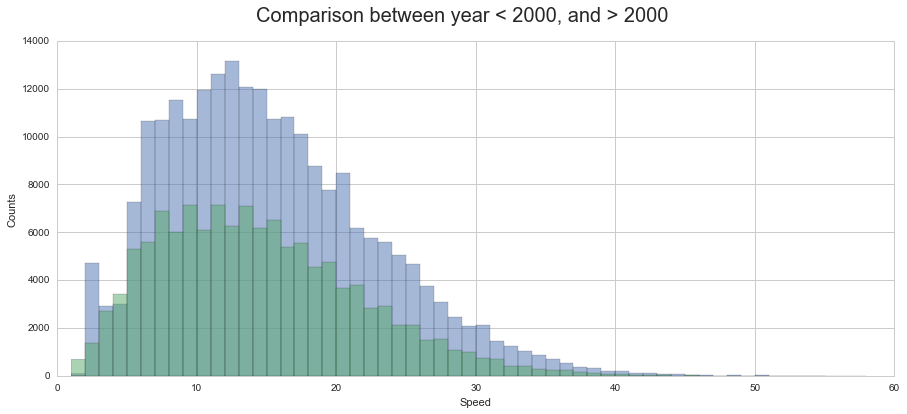

In [14]:
# Comparison between year < 2000, and > 2000, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
df_temp = df[df['date'] < 20000000]
bins = np.arange(min(df_temp.speed), max(df_temp.speed) + 1, 1)
df_temp['speed'].hist(bins=bins,alpha = 0.5,figsize=(15, 6))

df_temp = df[df['date'] > 20000000]
bins = np.arange(min(df_temp.speed), max(df_temp.speed) + 1, 1)
df_temp['speed'].hist(bins=bins, alpha = 0.5,figsize=(15, 6))

plt.xlabel("Speed")
plt.ylabel("Counts")
plt.suptitle('Comparison between year < 2000, and > 2000', fontsize = 20)

In [15]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
def check_time_shift(df):
    for start_time in xrange(19750000,20150000,50000):
        end_time = start_time + 50000 
        sub_df = df[ (df['date'] >= start_time) & (df['date'] < end_time)]
        fig = plt.figure()
        bins = np.arange(min(sub_df.speed), max(sub_df.speed) + 1, 1)
        sub_df['speed'].hist(bins=bins)
        fig.suptitle(start_time)

    for start_time in xrange(19750000,20150000,50000):
        end_time = start_time + 50000 
        sub_df = df[ (df['date'] >= start_time) & (df['date'] < end_time)]
        bins=np.arange(min(sub_df.dir), max(sub_df.dir) + 10, 5)
        fig = plt.figure()
        sub_df['dir'].hist(bins=bins, alpha=0.3,figsize=(15, 6))
        fig.suptitle(start_time)
    
# check_time_shift(df)

# Re-select time range after looking at data

In [16]:
if "ciampino" in ipath: 
    # For Ciampino
    df = df[ (df['date'] >= 20100000) & (df['date'] < 20150000)]
elif "marham" in ipath:
    # For Marham
    # speed still suffers from odd-even bias
    df = df[ (df['date'] >= 20100000) & (df['date'] < 20150000)]
else: 
    # For Tiree, non is stable
    df = df[ (df['date'] > 19720000) & (df['date'] < 20150000)]

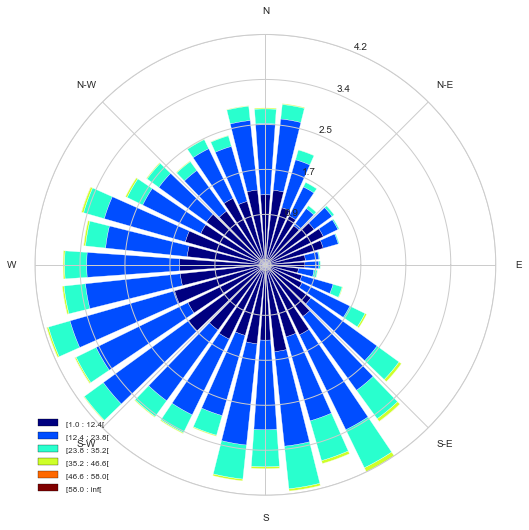

In [17]:
from windrose import WindroseAxes

df.dir_windrose = df.dir
# 90 degree is in east
ax = WindroseAxes.from_ax()
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36)
ax.set_legend()

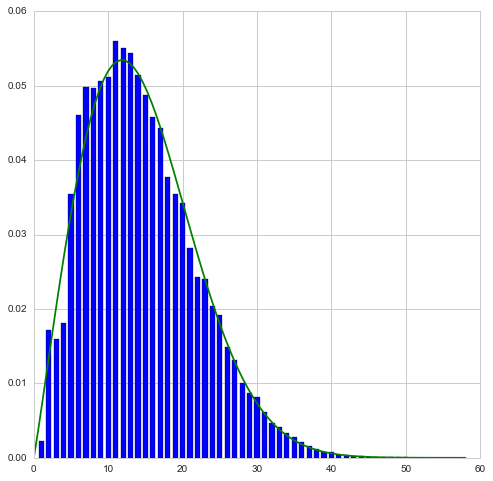

In [18]:
from windrose import WindAxes
ax = WindAxes.from_ax()
bins=np.arange(min(df.speed), max(df.speed) + 1, 1)
ax, params = ax.pdf(df.speed, bins = bins)

In [19]:
print params
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
print weibull_params

(1, 2.0593346575906928, 0, 16.356200466243735)
(1, 2.0593346575906928, 0, 16.356200466243735)


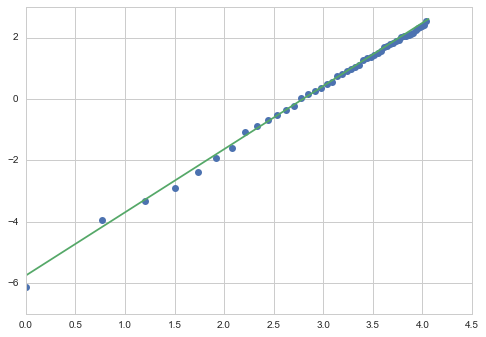

In [20]:
sample = df.speed
ecdf = sm.distributions.ECDF(sample)

x = np.linspace(min(sample), max(sample))
y = ecdf(x)
plt.plot(np.log(x), np.log(-np.log(1-y)),'o')

x = np.linspace(min(sample), max(sample))
w_scale = weibull_params[1]
c_shape = weibull_params[3]
qz=np.exp(-(x/c_shape)**w_scale)
plt.plot(np.log(x), np.log(-np.log(qz)),'-')
plt.show()

In [21]:
# convert from windrose system to polar system
df['dir'] = 90-df.dir

df['dir'] = df['dir'].apply(lambda x: x + 360 if x < 0 else x)

In [22]:
# # Randomize angle
def randomize_angle(df):
    df['random_angle_incre'] = 0
    df['random_angle_incre'] = df['random_angle_incre'].apply(lambda x: np.random.uniform(-5,5))
    df['dir_ran']=df['dir']+df['random_angle_incre']
    bins=np.arange(min(df.dir_ran), max(df.dir_ran) + 1, 1)

    df['dir_ran']= df['dir_ran'].apply(lambda x: x + 360 if x < 0 else x)
    df['dir_ran']= df['dir_ran'].apply(lambda x: x - 360 if x > 360 else x)
    df['dir'].hist(bins=bins, alpha=0.5,figsize=(15, 6))
    df['dir_ran'].hist(bins=bins, alpha=0.5,figsize=(15, 6))
    return df

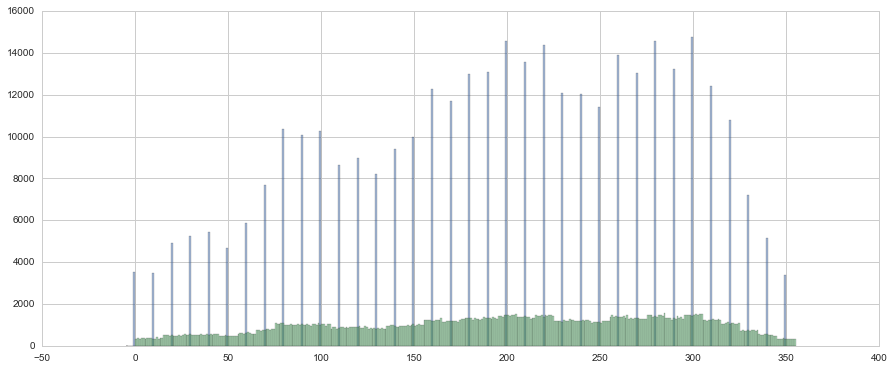

In [23]:
# Randomize the angle degree, to form a better KDE estimation
df = randomize_angle(df)
df['dir']=df['dir_ran']

-2.59484064324 -2.75226330542


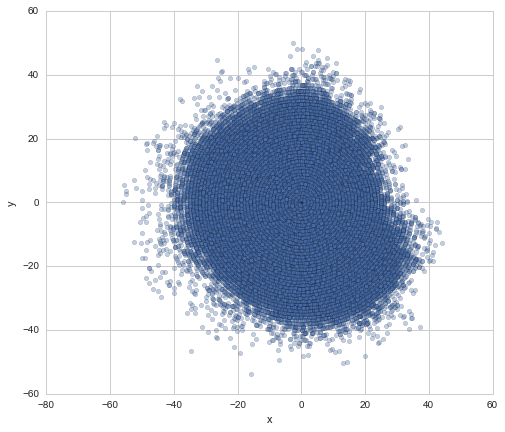

In [24]:
alpha = 0
df['phi'] = df['dir'] - alpha
df['u'] = df['speed'] * np.cos(df['phi'] * pi / 180.0)
df['v'] = df['speed'] * np.sin(df['phi'] * pi / 180.0)
df['x']=df.u
df['y']=df.v
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
ax.set_aspect('equal')
df.plot(kind='scatter', x='x', y='y', alpha=0.35, ax=ax)
print np.mean(df.x), np.mean(df.y)

In [25]:
# Check if there is any missing dir 
if 'dir_ran' not in df.columns:
    print df['dir'].value_counts()

# Naive OEN Estimation (Single Gaussian)
Optional, only for demonstration purpose

In [26]:
run_single_OEN = False

In [27]:
import pylab 
import scipy.stats as stats
def cor_of_alpha(alpha):
    df['phi'] = df['dir'] - alpha
    df['u'] = df['speed'] * np.cos(df['phi'] * pi / 180.0)
    df['v'] = df['speed'] * np.sin(df['phi'] * pi / 180.0)
    cor = sp.stats.pearsonr(df['u'],df['v'])
    return cor[0]

# Try plot alpha - cor
def plot_cor():
    cors = []
    for alpha in np.arange(0,180,10):
        cor = cor_of_alpha(alpha)
        std_u = np.std(df.u)
        std_v = np.std(df.v)
        comb = [alpha, cor, std_u, std_v]
        cors.append(comb)
        print comb

    plt.scatter(zip(*cors)[0], zip(*cors)[1]) # plot rotation-correlation
    plt.title('Rotation angle - Correlation')
    pylab.show()
    
    pylab.plot(zip(*cors)[0], zip(*cors)[2]) # plot rotation-std_u
    pylab.plot(zip(*cors)[0], zip(*cors)[3]) # plot rotation-std_v
    plt.title('Rotation angle - std')
    pylab.show()
    
if run_single_OEN: plot_cor() 

In [28]:
def rotate_for_lowest_correlation(df):
    # Find the desired alpha for lowest correlation between u,v
    # alpha is the rotation angle for u-v panel
    alpha = sp.optimize.brentq(cor_of_alpha, 0, 90)
    df['phi'] = df['dir'] - alpha
    df['u'] = df['speed'] * np.cos(df['phi'] * pi / 180.0)
    df['v'] = df['speed'] * np.sin(df['phi'] * pi / 180.0)
    cor = sp.stats.pearsonr(df.u,df.v)
    print 'rotation angle and corresponding correlation: \n', alpha, cor
    return df  # return the dataset that has rorated u,v value

if run_single_OEN: df = rotate_for_lowest_correlation(df)

In [29]:
# Compare u,v with normal distrubution
## P-P plot, vs Q-Q plot, should be q-q
def plot_against_normal_distribution(df):
    mean,std = np.mean(df.u),np.std(df.u)
    df['u_norm']=df['u'].apply(lambda x: (x-mean)/std)
    print 'u mean and std:', mean, std

    mean,std = np.mean(df.v),np.std(df.v)
    df['v_norm']=df['v'].apply(lambda x: (x-mean)/std)
    print 'v mean and std:', mean, std

    stats.probplot(df.u_norm, dist="norm", plot=pylab)
    stats.probplot(df.v_norm, dist="norm", plot=pylab)

    pylab.show()
    
if run_single_OEN: plot_against_normal_distribution(df)

In [30]:
from scipy import integrate
from math import *

def calculate_the_probability_distribution_of_windspeed(df):
    u,v = np.mean(df.u), np.mean(df.v)
    sigu, sigv = np.std(df.u), np.std(df.v)
    U = sqrt((u)**2 + (v)**2) # the R value of the centre of the ellipse, in polar coords
    phi = atan(u/v) # the angle of the centre of the elliplse, in polar coords

    def f(V,theta):
        return exp(-1/2* (( (V*cos(theta)-U*cos(phi)) /sigu)**2 + ((V*sin(theta)-U*sin(phi)) /sigv)**2))/(2*np.pi*sigu*sigv)*V

    # x is the speed, y is the probalility
    x_vals = np.linspace(0,50.)
    y_vals =[integrate.nquad(f, [[0, x_val],[0, 2*np.pi]]) for x_val in x_vals]
    return x_vals,y_vals

In [31]:
def plot_comparison(df):
    sample = df.speed
    ecdf = sm.distributions.ECDF(sample)

    # Empirical distribution, plot points
    x = np.linspace(min(sample), max(sample))
    y = ecdf(x)
    plt.plot(np.log(x), np.log(-np.log(1-y)),'o')

    # Weibull distribution
    x = np.linspace(min(sample), max(sample))
    w_scale = weibull_params[1] # The Weibull need previous code fitting 
    c_shape = weibull_params[3]
    qz=np.exp(-(x/c_shape)**w_scale)
    plt.plot(np.log(x), np.log(-np.log(qz)),'-')

    # OEN distribution
    x, y_ = x_vals, y_vals
    y = np.array(zip(*y_)[0])
    plt.plot(np.log(x), np.log(-np.log(1-y)),'-')

    plt.show()
    
if run_single_OEN:
    x_vals,y_vals = calculate_the_probability_distribution_of_windspeed(df)
    plot_comparison(df)

### Single OEN Fitting

In [32]:
def run_single_OEN_fitting(df):
    plot_cor()
    df = rotate_for_lowest_correlation(df)
    plot_against_normal_distribution(df)
    x_vals,y_vals = calculate_the_probability_distribution_of_windspeed(df)
    plot_comparison(df)

# 0. Create Input, speed_set

In [33]:
# speed_set = np.array(zip(-df.x, -df.y)) # Adjust the direction to match for Cook's paper
speed_set = np.array(zip(df.x, df.y))
speed_angle_set = np.array(zip(df.speed, df.dir))

# 1. Kernel Density Estimation

In [34]:
sample = speed_set
from sklearn.neighbors import KernelDensity
kde = KernelDensity(bandwidth=1).fit(sample) # need to consider the bandwidth for different sites

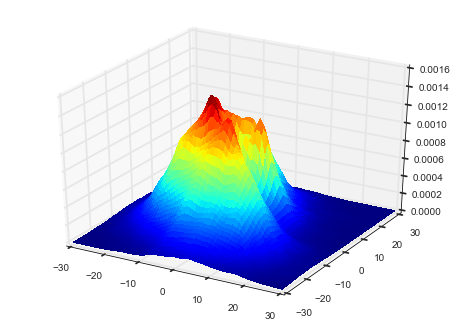

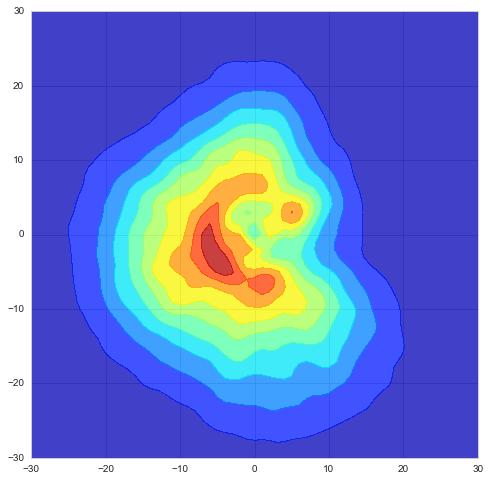

In [35]:
# Plot jPDF
from mpl_toolkits.mplot3d import Axes3D
from itertools import product

def plot_3d_prob_density(X,Y,Z):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(X, Y)
    surf = ax.plot_surface(
        X, Y, Z,rstride=1, cstride=1, cmap='jet',
                       linewidth=0, antialiased=False)
    return plt.show()

def plot_2d_prob_density(X,Y,Z):
    fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
    ax.set_aspect('equal')
    # For docs, see `help(plt.contour)`
    return plt.contourf(X, Y, Z, 10, alpha=.75, cmap='jet')  

X = Y = np.arange(-30, 31, 1)
XX,YY=np.meshgrid(X,Y)
coords=np.array((XX.ravel(), YY.ravel())).T  
Z = np.exp(kde.score_samples(coords)).reshape(len(X),len(Y))

plot_3d_prob_density(X,Y,Z)

plot_2d_prob_density(X,Y,Z)

In [36]:
# Can get the result, but speed is very slow
def f(x,y):
    # exp to turn log probabilty into normal
    return exp(kde.score_samples([x,y]))

# Check for the corretness of the method, should ~1
# integrate.nquad(f, [[-50, 50],[-50, 50]])

# Query for the prob of a certain point
exp(kde.score_samples([0,0]))

/Users/cqcn1991/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


0.0006119596887603541

# 2. GMM Estimation, using EM algo

In [37]:
from sklearn import mixture
import matplotlib as mpl
from matplotlib.patches import Ellipse

In [38]:
sample= speed_set

# fit a Gaussian Mixture Model with two components
clf = mixture.GMM(n_components=3, covariance_type='full')
clf.fit(sample)

print clf.converged_

for i in [0,1,2]:
    print clf.weights_[i], clf.means_[i], clf.covars_[i]

True
0.330019375226 [-0.69008158  6.0096906 ] [[ 60.45090957  -0.74995544]
 [ -0.74995544  94.49749542]]
0.346344682354 [-10.00818437  -3.57772446] [[ 81.05710407 -10.84717832]
 [-10.84717832  93.40858693]]
0.32363594242 [  3.39635047 -10.80365727] [[ 90.60748316 -19.8915911 ]
 [-19.8915911   94.80006061]]


In [39]:
from numpy import inf
# Check pdf
def f(x,y):
    # exp to turn log probabilty into normal
    return exp(clf.score([[x,y]]))
# integrate.nquad(f, [[-50, 50],[-50, 50]])

-178.738742395 [-0.69008158  6.0096906 ] [ 60.43439806  94.51400693]
-149.827312864 [-10.00818437  -3.57772446] [ 74.75081603  99.71487497]
-138.007974288 [  3.39635047 -10.80365727] [  72.70202639  112.70551738]


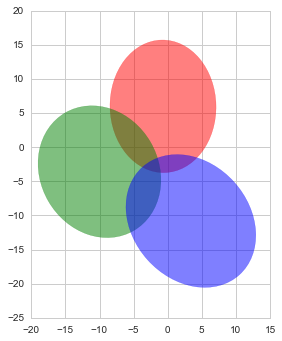

In [40]:
# how to write the for loop?
fig, ax = plt.subplots()
for i, color in enumerate('rgb'):
    # eigenvalues, and eigen vector
    v, w = np.linalg.eigh(clf._get_covars()[i][:2, :2])

    u1 = w[0] / np.linalg.norm(w[0])
    angle = np.arctan2(u1[1], u1[0])
    angle = 180 * angle / np.pi
    # angle, mean, eigenvalues, 
    print angle, clf.means_[i], v
    # half width stands for std value
    ell = mpl.patches.Ellipse(xy=clf.means_[i], width=2*sqrt(v[0]), height=2*sqrt(v[1]), angle = angle, color=color)
    ell.set_alpha(0.5)
    ax.add_patch(ell)
    
# plt.scatter(sample[:, 0], sample[:, 1],  marker='+', alpha=0.5, color = 'y')
ax.set_aspect('equal')
ax.autoscale()
plt.draw() 

In [41]:
from sklearn import mixture
from matplotlib.colors import LogNorm
import matplotlib as mpl
from matplotlib.patches import Ellipse

(-50, 50)

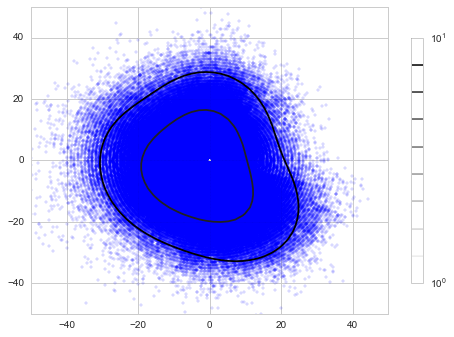

In [42]:
sample= speed_set
# plot sample point
plt.scatter(sample[:, 0], sample[:, 1], marker='+', alpha=0.5)

x = y = np.linspace(-50, 50)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)[0]
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=10.0),
                 levels=np.logspace(0, 1, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.xlim((-50,50))
plt.ylim((-50, 50))

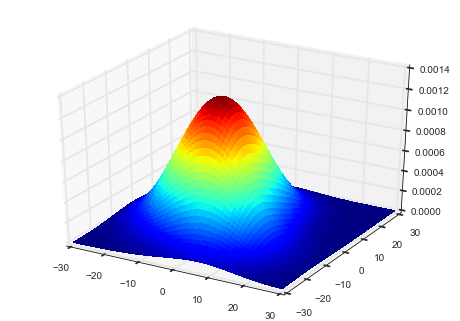

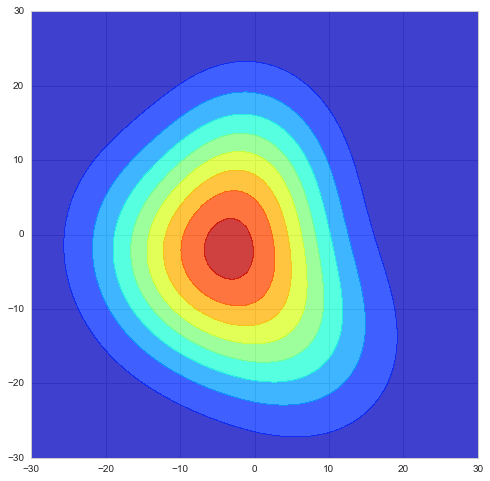

In [43]:
X = Y = np.arange(-30, 31, 1)
XX,YY=np.meshgrid(X,Y)
coords=np.array((XX.ravel(), YY.ravel())).T  
Z = np.exp(clf.score_samples(coords)[0]).reshape(XX.shape)
    
plot_3d_prob_density(X,Y,Z)

plot_2d_prob_density(X,Y,Z)

## GMM, EM VS. KDE

In [44]:
panel_array = []
for i in np.arange(-30, 31, 1):
    for j in np.arange(-30, 31, 1):
        panel_array.append([i,j])

points = panel_array
gmm_pdf_result = np.exp(clf.score_samples(points)[0])

In [45]:
kde_result = np.exp(kde.score_samples(points))
kde_result

array([  1.16639052e-06,   1.41339543e-06,   1.97161777e-06, ...,
         4.74209030e-11,   1.96335953e-12,   2.07275837e-12])

In [46]:
test_point = [0,0]
print exp(kde.score_samples(test_point))
print exp(clf.score_samples(test_point)[0])

0.00061195968876
0.00117911839055


/Users/cqcn1991/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/cqcn1991/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


### RMSE & R Square

In [47]:
error_array = np.power(gmm_pdf_result - kde_result,2)
rmse = np.sqrt(np.average(error_array))
print rmse

5.87795286746e-05


In [48]:
# R square measure:
# https://en.wikipedia.org/wiki/Coefficient_of_determination
y_mean = np.mean(kde_result)
SS_tot = np.power(kde_result - y_mean,2)
SS_tot_avg = np.average(SS_tot)
print SS_tot_avg

# The original value is result.fun is log of rmse
SS_res_avg = np.average(error_array)
print SS_res_avg

R_square = 1 - SS_res_avg/SS_tot_avg 
print R_square

1.07645005642e-07
3.45503299121e-09
0.967903452923


In [49]:
# This calculation speed is very slow
def f(V,theta):
    return exp(clf.score([[V*cos(theta),V*sin(theta)]]))*V
# integrate.nquad(f, [[0, inf],[0, 2*np.pi]])

x_vals_OEN3_EM = np.linspace(0,50)
y_vals_OEN3_EM =[integrate.nquad(f, [[0, x_val],[0, 2*np.pi]]) for x_val in x_vals_OEN3_EM]

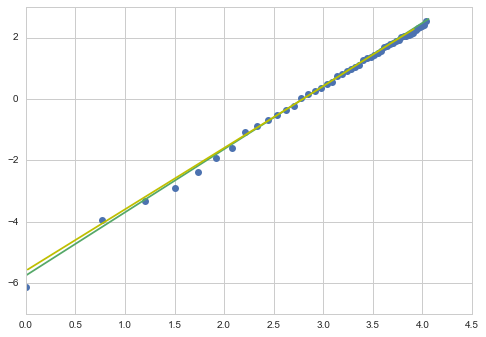

In [50]:
sample = df.speed
ecdf = sm.distributions.ECDF(sample)

# Plot points, with empirical distribution
x = np.linspace(min(sample), max(sample))
y = ecdf(x)
plt.plot(np.log(x), np.log(-np.log(1-y)),'o')

# Weibull distribution
x = np.linspace(min(sample), max(sample))
w_scale = weibull_params[1]
c_shape = weibull_params[3]
qz=np.exp(-(x/c_shape)**w_scale)
plt.plot(np.log(x), np.log(-np.log(qz)),'-')

# OEN3 distribution
x, y_ = x_vals_OEN3_EM, y_vals_OEN3_EM
y = np.array(zip(*y_)[0])
plt.plot(np.log(x), np.log(-np.log(1-y)),'-', color = 'y')

plt.show()

In [51]:
# # Calculate angle distribution
# def f(V,theta):
#     return exp(clf.score([[V*cos(theta),V*sin(theta)]]))*V

# integrate.nquad(f, [[0, inf],[0, 2*np.pi]])

# x_vals = np.linspace(0,2*np.pi, num=36)
# y_vals =[integrate.nquad(f, [[0, inf],[x_val, x_val+np.pi/18]]) for x_val in x_vals]

In [52]:
# x, y_ = x_vals, y_vals
# y = np.array(zip(*y_)[0])*len(sample)
# bins=np.arange(min(df.dir), max(df.dir) + 1, 1)
# df['dir'].hist(bins=bins, alpha=0.5,figsize=(15, 6))
# plt.plot(x/np.pi*180, y,'-', color='black')
# plt.show()

# 3. Least Square Prob Estimation

In [53]:
from sklearn.neighbors import KernelDensity
if not kde:
    sample = speed_set
    kde = KernelDensity(bandwidth=1.0).fit(sample) 

In [54]:
panel_array = []
for i in np.arange(-30, 31, 1):
    for j in np.arange(-30, 31, 1):
        panel_array.append([i,j])

sample = panel_array

In [55]:
# very slow if the dataset is too large, e.g. 100,000
if not kde_result.all():
    kde_result = np.exp(kde.score_samples(sample))
kde_result

array([  1.16639052e-06,   1.41339543e-06,   1.97161777e-06, ...,
         4.74209030e-11,   1.96335953e-12,   2.07275837e-12])

In [56]:
print len(kde_result)

3721


In [57]:
gmm_em_result = []
gmm_em_result.extend(clf.weights_[0:3])
for i in [0,1,2]:
    meanx,meany=clf.means_[i].tolist()
    sigx,sigy = np.sqrt(clf.covars_ [i][0,0]), np.sqrt(clf.covars_ [i][1,1])
    rho = clf.covars_ [i][0,1]/(sigx*sigy)
    gmm_em_result.extend([meanx,meany, sigx,sigy,rho])
    print meanx,meany, sigx,sigy,rho
    
print gmm_em_result

-0.690081582232 6.00969060237 7.77501830039 9.72098222489 -0.00992256356573
-10.0081843668 -3.57772446304 9.00317188953 9.66481178963 -0.124660205038
3.39635046908 -10.8036572652 9.51879630816 9.7365322683 -0.214626420273
[0.33001937522581115, 0.34634468235413268, 0.32363594242005683, -0.6900815822324516, 6.0096906023739525, 7.7750183003941764, 9.7209822248932625, -0.0099225635657292418, -10.00818436682693, -3.5777244630418017, 9.0031718895334585, 9.6648117896260146, -0.12466020503758515, 3.396350469082383, -10.803657265220314, 9.5187963081633136, 9.7365322683028808, -0.21462642027269044]


In [58]:
points = sample

from scipy.stats import multivariate_normal

def create_gaussian_2d(meanx,meany,sigx,sigy,rho):
    sigxy = rho*sigx*sigy
    return multivariate_normal(mean=[meanx,meany], cov=[[sigx**2,sigxy],[sigxy,sigy**2]], allow_singular=True)

def square_error(x0, log_mode = False):
    f1,f2,f3,\
    u1,v1,sigu1,sigv1,rho1, \
    u2,v2,sigu2,sigv2,rho2, \
    u3,v3,sigu3,sigv3,rho3 = x0
    # 1. Generate Mixed Gaussian Model  
    g1 = create_gaussian_2d(u1,v1,sigu1,sigv1,rho1)   
    g2 = create_gaussian_2d(u2,v2,sigu2,sigv2,rho2)
    g3 = create_gaussian_2d(u3,v3,sigu3,sigv3,rho3) 
    def mixed_model(points):
        return f1*g1.pdf(points)+f2*g2.pdf(points)+f3*g3.pdf(points)
    # 2. Calculate the sum of square error
    # kde returns log prob, so need to convert it
    if log_mode:
        error_array = np.power(np.log(mixed_model(points)) - np.log(kde_result),2)
        mse = np.average(error_array)
        rmse = np.sqrt(mse)
        result = rmse
    else:
#         error_array = np.power(mixed_model(points) - cook_kde,2)
        error_array = np.power(mixed_model(points) - kde_result,2)
        mse = np.average(error_array)
        rmse = np.sqrt(mse)
        result = np.log(rmse)
    return result
    # The returned number seems too small, how to deal with it?   

cons = [{'type': 'eq', 'fun': lambda x: -x[0] - x[1] - x[2]+ 1}]
bonds = [(0., 0.99),(0., 0.99),(0., 0.99),
            (-30, 30),(-30, 30),(0., 30),(0., 30),(-0.99, 0.99),
            (-30, 30),(-30, 30),(0., 30),(0., 30),(-0.99, 0.99),
            (-30, 30),(-30, 30),(0., 30),(0., 30),(-0.99, 0.99),]

# from GMM,EM 
x0 = gmm_em_result

result = sp.optimize.minimize(
    square_error,
    x0,
    method = 'SLSQP', 
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -9.9860077300226191
     jac: array([  3.44163537e-01,   3.44162464e-01,   3.44162941e-01,
        -1.19209290e-07,   0.00000000e+00,  -1.19209290e-07,
        -1.19209290e-07,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -3.57627869e-07,  -1.19209290e-07,   0.00000000e+00,
        -2.38418579e-07,   0.00000000e+00,  -5.96046448e-07,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 2375
     nit: 118
    njev: 118
  status: 0
 success: True
       x: array([  0.06245073,   0.22181659,   0.71573268,   4.24464537,
         6.86396479,   4.64962823,   4.50134741,  -0.43437905,
        -4.75818626,   7.30052767,   8.06287156,  10.90159733,
         0.61591356,  -2.15929395,  -6.56963204,  11.31540708,
        10.2134339 ,  -0.33794098])

## LRMSE VS. KDE

In [59]:
# Least Root Mean Square Error result
exp(result.fun)

4.6039642919195025e-05

In [60]:
# RMSE / Mode
print exp(result.fun)/np.max(kde_result)
print exp(result.fun)/np.mean(kde_result)

0.0313807425109
0.174212767254


In [61]:
# R square measure:
# https://en.wikipedia.org/wiki/Coefficient_of_determination

y_mean = np.mean(kde_result)
SS_tot = np.power(kde_result - y_mean,2)
SS_tot_avg = np.average(SS_tot)
print SS_tot_avg

# The original value is result.fun is log of rmse
SS_res_avg = np.square(exp(result.fun))
print SS_res_avg

R_square = 1 - SS_res_avg/SS_tot_avg 
print R_square

1.07645005642e-07
2.11964872013e-09
0.980308898611


In [62]:
# np.mean(cook_kde)/np.mean(kde_result)

In [63]:
f1,f2, f3,\
u1,v1,sigu1,sigv1,rho1, \
u2,v2,sigu2,sigv2,rho2, \
u3,v3,sigu3,sigv3,rho3 = result.x

g1 = f1,u1,v1,sigu1,sigv1,rho1
g2 = f2,u2,v2,sigu2,sigv2,rho2
g3 = f3,u3,v3,sigu3,sigv3,rho3
gmm = [g1,g2,g3]

0.0624507273658 [[ 7.91849171]
 [ 1.55836964]] [ 3.43859405  5.48244855] 47.1339345974 
0.221816589967 [[-7.88981721]
 [ 3.69984124]] [  5.60955797  12.34453651] 328.218371006 
0.715732682668 [[-6.56344399]
 [-2.17803087]] [  8.68096241  12.52970714] 53.4473925823 


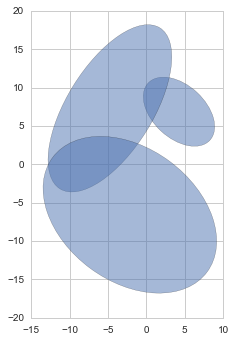

In [64]:
fig, ax = plt.subplots()

for g in gmm:
    xy_mean = np.matrix([g[1],g[2]])
    sigx, sigy, sigxy = g[3],g[4],g[5]*g[3]*g[4]
    cov_matrix = np.matrix([[sigx**2, sigxy], [sigxy, sigy**2]])

    # eigenvalues, and eigen vector
    w, v = np.linalg.eigh(cov_matrix)

    uu = v[0] / np.linalg.norm(v[0])
    angle_arc = -(np.arctan2(uu[0,1], uu[0,0])+np.pi)
    # rorate angle, counter clock wise
    angle = - 180 * angle_arc / np.pi
    
    transform_matrix = np.matrix([[np.cos(angle_arc ), -np.sin(angle_arc )], [np.sin(angle_arc ), np.cos(angle_arc )]])
    xy_mean_in_uv = transform_matrix * xy_mean.T
    
    # print fraction, rotation agnle, u v mean(in standalone panel), std
    print g[0], xy_mean_in_uv, np.sqrt(w), angle, 
    print ''

    ell = mpl.patches.Ellipse(xy=xy_mean.T, width=2*sqrt(w[0]), height=2*sqrt(w[1]), angle = angle)
    ell.set_alpha(0.5)
    ax.add_patch(ell)


ax.autoscale()
ax.set_aspect('equal')
plt.draw() 

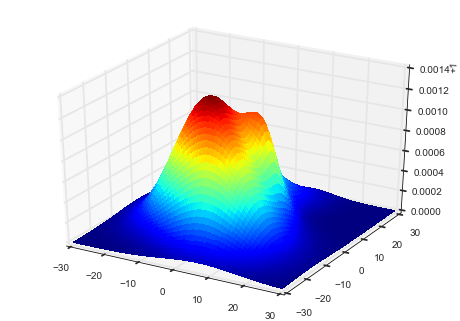

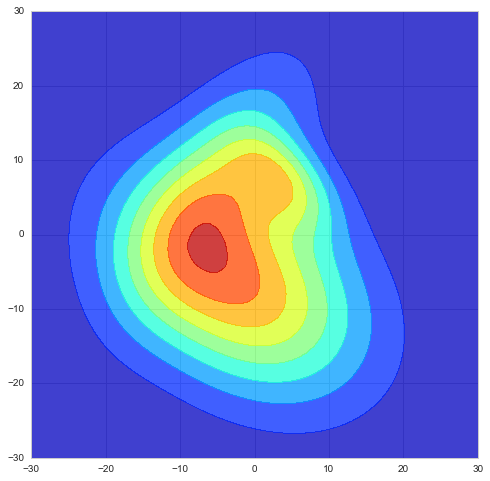

In [65]:
# Plot probability density 
g1 = create_gaussian_2d(u1,v1,sigu1,sigv1,rho1)   
g2 = create_gaussian_2d(u2,v2,sigu2,sigv2,rho2)
g3 = create_gaussian_2d(u3,v3,sigu3,sigv3,rho3) 
def mixed_model_pdf(points):
    return f1*g1.pdf(points)+f2*g2.pdf(points)+f3*g3.pdf(points)

X = Y = np.arange(-30, 31, 1)
XX,YY=np.meshgrid(X,Y)
coords=np.array((XX.ravel(), YY.ravel())).T  
Z = np.exp(mixed_model_pdf(coords)).reshape(XX.shape)
    
plot_3d_prob_density(X,Y,Z)

plot_2d_prob_density(X,Y,Z)

In [66]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

x_vals_OEN3_LMSE  = np.linspace(0,50)
y_vals_OEN3_LMSE =[integrate.nquad(f, [[0, x_val],[0, 2*np.pi]]) for x_val in x_vals_OEN3_LMSE ]

In [67]:
def f(V,theta):
    return np.exp(kde.score_samples([[V*cos(theta),V*sin(theta)]]))*V
# integrate.nquad(f, [[0, 50],[0, 2*np.pi]])

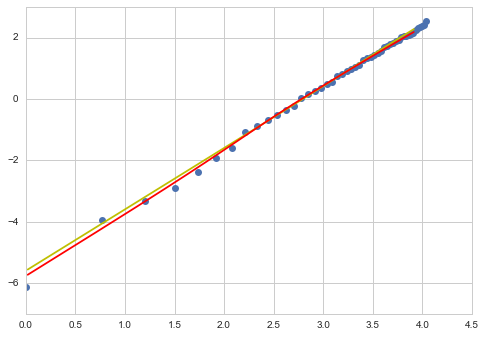

In [68]:
# Plot v-p
sample = df.speed
ecdf = sm.distributions.ECDF(sample)

# Plot points, with empirical distribution
x = np.linspace(min(sample), max(sample))
y = ecdf(x)
plt.plot(np.log(x), np.log(-np.log(1-y)),'o')

# OEN3 distribution, EM
x, y_ = x_vals_OEN3_EM, y_vals_OEN3_EM
y = np.array(zip(*y_)[0])
plt.plot(np.log(x), np.log(-np.log(1-y)),'-', color = 'y')

# OEN3 distribution, LMSE
x, y_ = x_vals_OEN3_LMSE, y_vals_OEN3_LMSE
y = np.array(zip(*y_)[0])
plt.plot(np.log(x), np.log(-np.log(1-y)),'-', color = 'r')

plt.show()

In [69]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

# Check, should ~1
# integrate.nquad(f, [[0, inf],[0, 2*np.pi]])

In [70]:
# Calculate Angle Distribution
x_vals = np.linspace(0,2*np.pi, num=36)
y_vals =[integrate.nquad(f, [[0, inf],[x_val, x_val+np.pi/18]]) for x_val in x_vals]

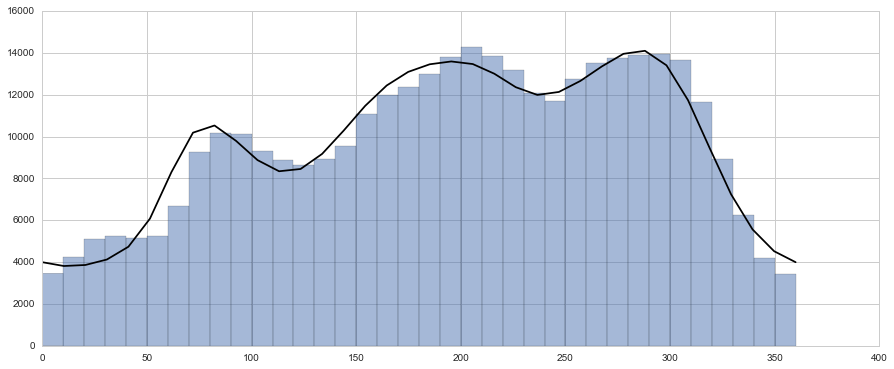

In [71]:
x, y_ = x_vals, y_vals
# 1. integrate.nquad returns 2 vaule, result, abserr. Need to abstract the first to plot
# 2. * length of data size, to adjust the plot space
y = np.array(zip(*y_)[0])*len(df['dir']) 

bins=np.arange(0, 360 + 1, 10)
df['dir'].hist(bins=bins, alpha=0.5,figsize=(15, 6))

plt.plot(x/np.pi*180, y,'-', color='black')
plt.show()

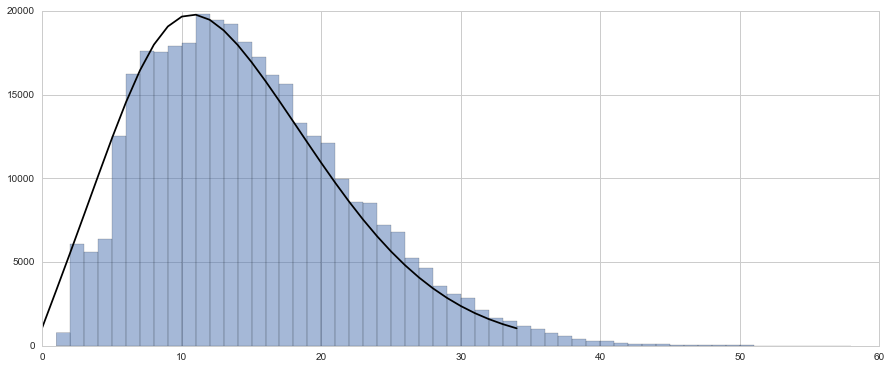

In [72]:
# Calculate Speed Distribution
x_vals = np.arange(0, 35, 1)
y_vals =[integrate.nquad(f, [[x_val, x_val+1],[0, 2*np.pi]]) for x_val in x_vals]

x, y_ = x_vals, y_vals
y = np.array(zip(*y_)[0])*len(df.speed)

bins=np.arange(min(df.speed), max(df.speed) + 1, 1)
df['speed'].hist(bins=bins, alpha=0.5,figsize=(15, 6))

plt.plot(x, y,'-', color='black')
plt.show()

In [73]:
# df['speed'].value_counts().sort_index()
# how to get the value out?

In [74]:
fff

NameError: name 'fff' is not defined

# KDE From Cook, Ciampino

In [ ]:
# points
# kde results should from [-30, -30], [-30, -29],[-30, -28] to [30,30]
kde_file = 'cook_kde.csv'
temp_matrix = np.loadtxt(open(kde_file,"rb"),delimiter=",",skiprows=1)
temp_matrix2 = temp_matrix.reshape(-1)
cook_kde = temp_matrix2
cook_kde

In [ ]:
error_array = np.power(kde_result - cook_kde,2)
mse = np.average(error_array)
rmse = np.sqrt(mse)
rmse

## OEN3 from Cook

In [ ]:
from scipy.stats import multivariate_normal, norm   

def create_rotate_norm_dist(meanx,meany,sigx,sigy,angle):
    # angle degree, from u,v to x,y, counter-clockwise
    alpha = angle
    alpha_arc = alpha * pi / 180.0
    transform_matrix = np.matrix([[np.cos(alpha_arc), -np.sin(alpha_arc)], [np.sin(alpha_arc), np.cos(alpha_arc)]])
    cov_matrix = np.matrix([[sigx**2, 0], [0, sigy**2]])
    # cov_matrix
    cov_trans = transform_matrix * cov_matrix * transform_matrix.T
    # need to converte by .tolist()[0]
    norm_mean = np.matrix.dot(transform_matrix,np.array([meanx,meany])).tolist()[0]
    norm_rotate = multivariate_normal(mean=norm_mean, cov=cov_trans, allow_singular=True)
    
    return norm_rotate

# need to change the direction of x,y of Cook, to comply with the standard in this program
g1 = create_rotate_norm_dist(0.0565402,3.5586487,5.809,9.237,10.511)
g2 = create_rotate_norm_dist(4.315,-0.407,3.002,4.173,75.193)
g3 = create_rotate_norm_dist(-0.491,-2.777,1.979,2.571,-25.358)

In [ ]:
# format to mean, std, rho
for g in [g1,g2,g3]:
    sigx,sigy = np.sqrt(g.cov[0,0]), np.sqrt(g.cov[1,1])
    rho = g.cov[0,1]/(sigx*sigy)
    print g.mean, sigx,sigy,rho

In [ ]:
# plot Cook's ellipses results.
# Input from Cook's LMSE result, 
# mean_u, mean_v, std_u, std_v, rotation_angle
gc1 = [0.0565402,3.5586487,5.809,9.237,10.511]
gc2 = [4.315,-0.407,3.002,4.173,75.193]
gc3 = [-0.491,-2.777,1.979,2.571,-25.358]

fig, ax = plt.subplots()
for g in [gc1,gc2,gc3]:
    xy_mean_in_uv = np.matrix([g[0],g[1]])
    std_x, std_y = g[2],g[3]
    
    angle = g[4]
    angle_arc = angle * pi / 180.0
    transform_matrix = np.matrix([[np.cos(angle_arc), -np.sin(angle_arc)], [np.sin(angle_arc), np.cos(angle_arc)]])
    xy_mean = transform_matrix * xy_mean_in_uv.T
    
    print xy_mean, g[2],g[3], angle
    
    ell = mpl.patches.Ellipse(xy=xy_mean, width=2*g[2], height=2*g[3], angle = angle)
    ell.set_alpha(0.5)
    ax.add_patch(ell)

ax.autoscale()
ax.set_aspect('equal')
plt.draw() 

In [ ]:
g=g3
# use np.matrix, not np.array
xy_mean = np.matrix([g.mean[0],g.mean[1]])
cov_matrix = g.cov

# eigenvalues, and eigen vector
w, v = np.linalg.eigh(cov_matrix)

uu = v[0] / np.linalg.norm(v[0])
angle_arc = -(np.arctan2(uu[1], uu[0])+np.pi)
# # rorate angle, counter clock wise
angle = - 180 * angle_arc / np.pi

transform_matrix = np.matrix([[np.cos(angle_arc ), -np.sin(angle_arc )], [np.sin(angle_arc ), np.cos(angle_arc )]])
xy_mean_in_uv = transform_matrix * xy_mean.T

# # print fraction, rotation agnle, u v mean(in standalone panel), std
print xy_mean_in_uv, np.sqrt(w),angle

In [ ]:
f1, f2 = 0.415, 0.298
def mixed_model_pdf(points):
    return f1*g1.pdf(points)+f2*g2.pdf(points)+(1-f1-f2)*g3.pdf(points)

X = Y = np.arange(-30, 31, 1)
XX,YY=np.meshgrid(X,Y)
coords=np.array((XX.ravel(), YY.ravel())).T 
Z = mixed_model_pdf(coords).reshape(XX.shape)

plot_3d_prob_density(X,Y,Z)

plot_2d_prob_density(X,Y,Z)

In [ ]:
# points is [-30,30]
error_array = np.power(mixed_model_pdf(points) - cook_kde,2)
mse = np.average(error_array)
rmse = np.sqrt(mse)

In [ ]:
rmse